# Trabalho Prático 1: Geometria Computacional

Filipe Pirola Santos - 2021031580

Igor Eduardo Martins Braga - 2022425671

Wallace Eduardo Pereira - 2021032013

# Bibliotecas


In [2]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Limpando e plotando datasets

**Função de plotagem dos gráficos**

In [4]:
def plot_scatter(dataframe):

    sns.scatterplot(data=dataframe, x='X', y='Y', hue='Class', alpha=0.6, palette="deep")

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.show()

**Função de importação de datasets do site UC Irvine**

In [5]:
def import_uci(id):
    dataframe = fetch_ucirepo(id=id)
    features = dataframe.data.features 
    targets = dataframe.data.targets
    return features, targets

**Função de redução de dimensão do dataset**

In [6]:
def reduce_dimension_dataset(data):
  pca = PCA(n_components=2)
  data = StandardScaler().fit_transform(data)
  componentes = pca.fit_transform(data)
  two_dimensional_df = pd.DataFrame(data=componentes, columns=["X","Y"])

  return two_dimensional_df

### Dataset Iris - Separável

Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

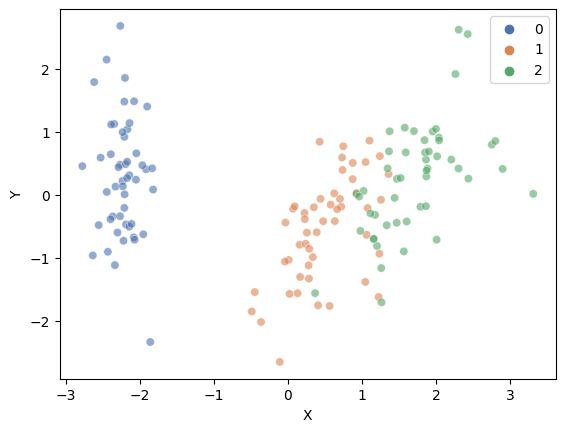

In [7]:
from sklearn.datasets import load_iris

# Carregando dataset Iris
iris = load_iris()

iris_data = iris.data

# Normalizando os dados
normalized_data = StandardScaler().fit_transform(iris_data)

pca = PCA(n_components=2)
components = pca.fit_transform(normalized_data)
iris_df = pd.DataFrame(data=components, columns=["X","Y"])

# Adicionando coluna de Classe no dataset reduzido dimensionalmente
iris_df['Class'] = iris.target

plot_scatter(iris_df)

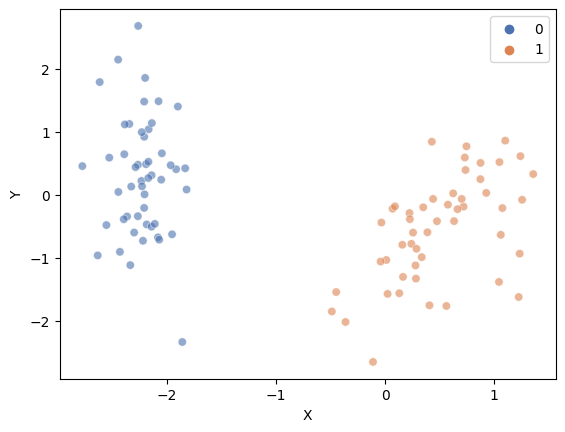

In [8]:
iris_filtered = iris_df[iris_df['Class'] != 2]

train_data, test_data = train_test_split(iris_filtered, test_size=0.3, random_state=42)

plot_scatter(iris_filtered)

### Dataset Wine - Separável

Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

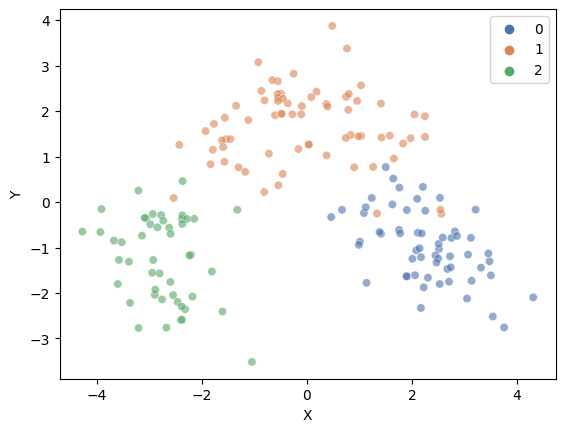

In [9]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_data = wine.data

pca = PCA(n_components=2)
normalized_data = StandardScaler().fit_transform(wine_data)
componentes = pca.fit_transform(normalized_data)
wine_df = pd.DataFrame(data=componentes, columns=["X","Y"])

wine_df['Class'] = wine.target

plot_scatter(wine_df)

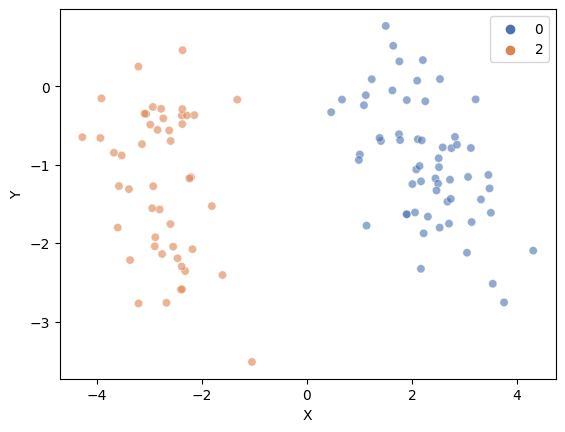

In [10]:
wine_filtered = wine_df[wine_df['Class'] != 1]

plot_scatter(wine_filtered)

### Digits DataSet - Não separável

Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

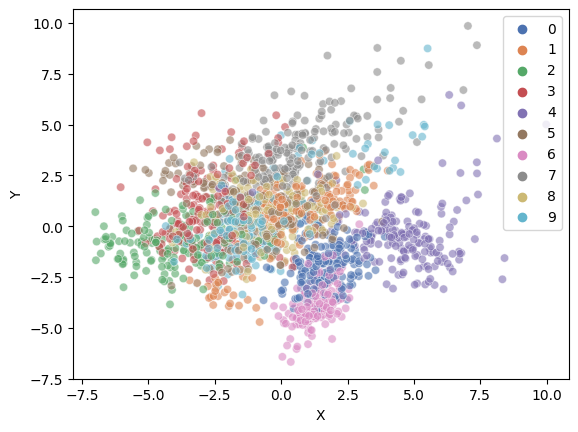

In [36]:
from sklearn.datasets import load_digits

digits = load_digits()
digits_data = digits.data

pca = PCA(n_components=2)
normalized_data = StandardScaler().fit_transform(digits_data)
componentes = pca.fit_transform(normalized_data)
digits_df = pd.DataFrame(data=componentes, columns=["X","Y"])

digits_df['Class'] = digits.target

plot_scatter(digits_df)

### Breast Cancer DataSet - Separável (Manipulado)

Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

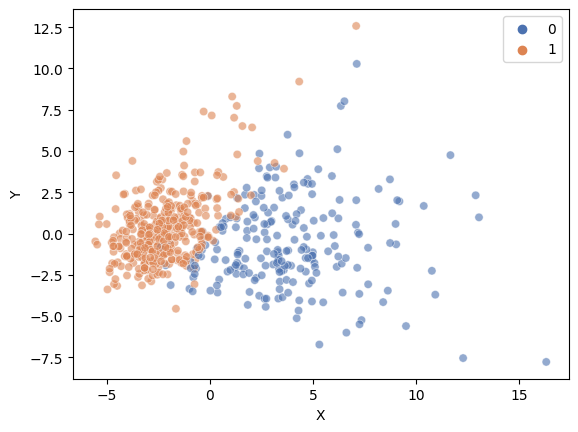

In [12]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data

pca = PCA(n_components=2)
normalized_data = StandardScaler().fit_transform(breast_cancer_data)
componentes = pca.fit_transform(normalized_data)
breast_cancer_df = pd.DataFrame(data=componentes, columns=["X","Y"])

breast_cancer_df['Class'] = breast_cancer.target

plot_scatter(breast_cancer_df)

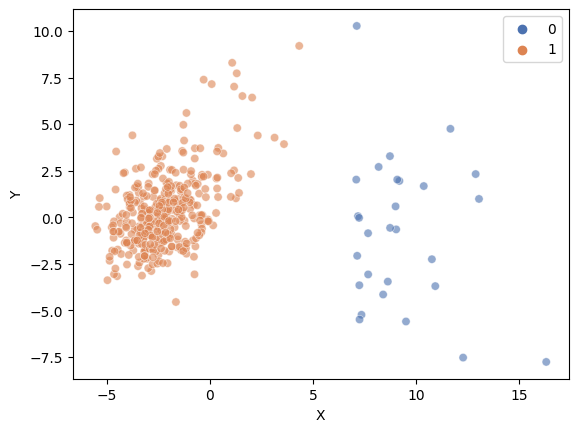

In [13]:
# Selecionar pontos da classe "Cammeo"
cammeo_rightmost_point = breast_cancer_df[breast_cancer_df['Class'] == 1].max()['X']

# Apagar pontos da classe 1 que estão à direita do ponto mais à esquerda da classe 0
filtered_rice_df = breast_cancer_df[(breast_cancer_df['Class'] != 0) | (breast_cancer_df['X'] >= cammeo_rightmost_point)]

# Encontrar o ponto mais acima (eixo Y) da classe 1
highest_y_point_class1 = filtered_rice_df[filtered_rice_df['Class'] == 1]['Y'].max()

# Apagar o ponto mais acima (eixo Y) da classe 1 do dataframe filtered_rice_df
filtered_rice_df = filtered_rice_df.drop(filtered_rice_df[(filtered_rice_df['Class'] == 1) & (filtered_rice_df['Y'] == highest_y_point_class1)].index)

plot_scatter(filtered_rice_df)

### Rice DataSet - Separável (Manipulado)

Link: https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

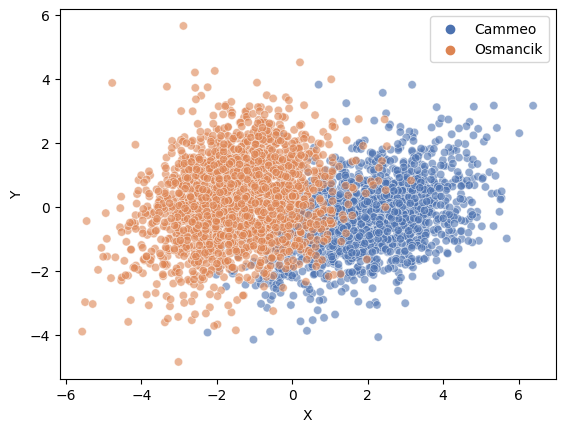

In [14]:
features, targets = import_uci(545)

normalized_data = StandardScaler().fit_transform(features)

# Apply PCA with 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(normalized_data)

# Create a dataframe with PCA components and class labels
rice_df = pd.DataFrame(data=components, columns=["X", "Y"])
rice_df['Class'] = targets

plot_scatter(rice_df)


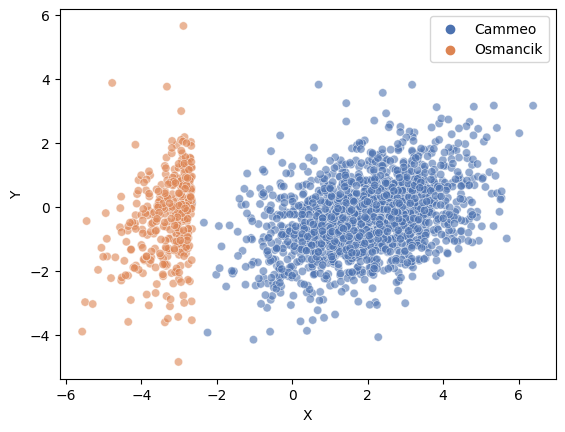

In [15]:
# Selecionar ponto mais à esqueda da classe "Cammeo"
cammeo_leftmost_point = rice_df[rice_df['Class'] == 'Cammeo'].min()['X']

# Apagar pontos à direita do ponto mais à esquerda de "Cammeo" para a classe "Osmancik"
filtered_rice_df = rice_df[(rice_df['Class'] != 'Osmancik') | (rice_df['X'] <= cammeo_leftmost_point)]

plot_scatter(filtered_rice_df)

### Lung Cancer DataSet - Separável (Manipulado)

Link: https://archive.ics.uci.edu/dataset/62/lung+cancer

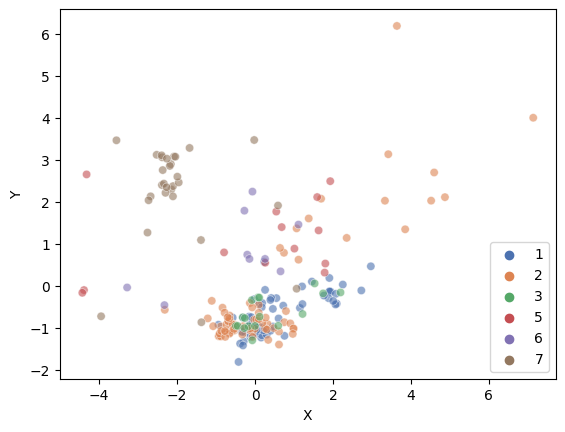

In [73]:
features, targets = import_uci(42)

normalized_data = StandardScaler().fit_transform(features)

# Apply PCA with 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(normalized_data)

# Create a dataframe with PCA components and class labels
lung_cancer_df = pd.DataFrame(data=components, columns=["X", "Y"])
lung_cancer_df['Class'] = targets

plot_scatter(lung_cancer_df)

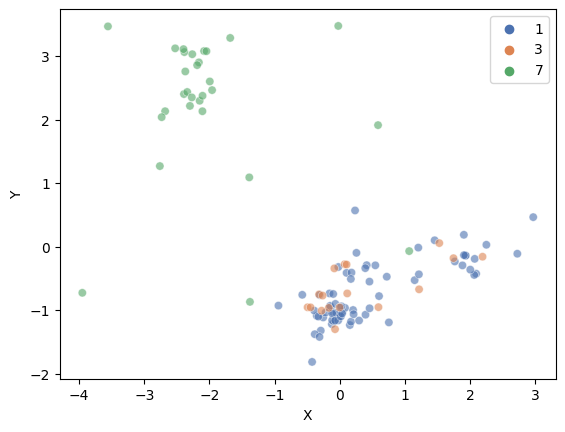

In [88]:
# Seleciona as classes 7, 1 e 3 do dataframe
lung_cancer_df = lung_cancer_df[(lung_cancer_df['Class'] == 7) | (lung_cancer_df['Class'] == 1) | (lung_cancer_df['Class'] == 3)]

plot_scatter(lung_cancer_df)

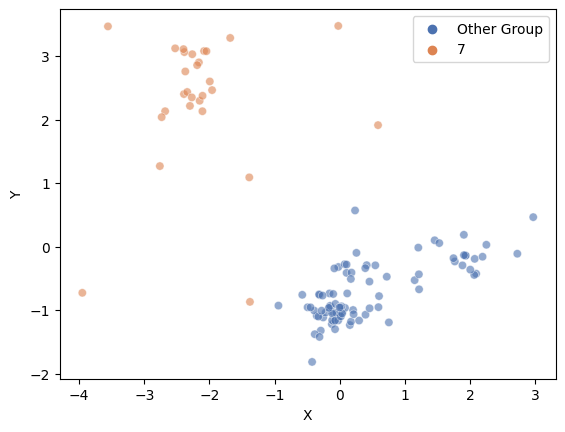

In [89]:
# Fazer uma cópia do dataframe
new_lung_cancer_df = lung_cancer_df.copy()

# Classificar todos os pontos diferentes da classe 7 de "Other Group"
new_lung_cancer_df.loc[new_lung_cancer_df['Class'] != 7, 'Class'] = "Other Group"

# Selecionar ponto mais à direita da classe 7
rightmost_point = new_lung_cancer_df[new_lung_cancer_df['Class'] == 7].max()['X']

# Remover o ponto mais à direita da classe 7
lung_cancer_filtered = new_lung_cancer_df.drop(new_lung_cancer_df[(new_lung_cancer_df['Class'] == 7) & (new_lung_cancer_df['X'] == rightmost_point)].index)

plot_scatter(lung_cancer_filtered)

### Forest Fire DataSet  - Não sei se vou usar esse!!!

In [17]:
df = pd.read_csv("datasets/forestfires.csv")

df_numerico = df.select_dtypes(include='number')

new_df = df_numerico.drop("area", axis=1)

normalized_data = StandardScaler().fit_transform(new_df)

# Aplicar PCA para reduzir a dimensionalidade para 2
pca = PCA(n_components=2)
components = pca.fit_transform(normalized_data)

# Criar um novo DataFrame com os componentes principais
forest_fire_df = pd.DataFrame(data=components, columns=['X', 'Y'])

# Concatenar o DataFrame original com os componentes principais
forest_fire_df['Class'] = df_numerico["area"]

# plot_scatter(forest_fire_df)


### Dry Bean DataSet - Separável (Manipulado)

Link: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

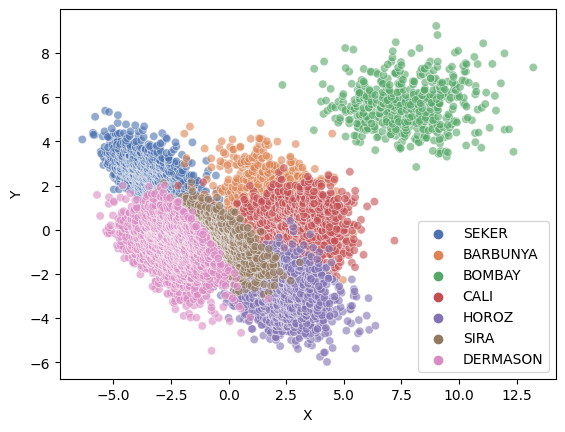

In [33]:
features, targets = import_uci(602)

normalized_data = StandardScaler().fit_transform(features)

# Apply PCA with 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(normalized_data)

# Create a dataframe with PCA components and class labels
dry_bean_df = pd.DataFrame(data=components, columns=["X", "Y"])
dry_bean_df['Class'] = targets

plot_scatter(dry_bean_df)

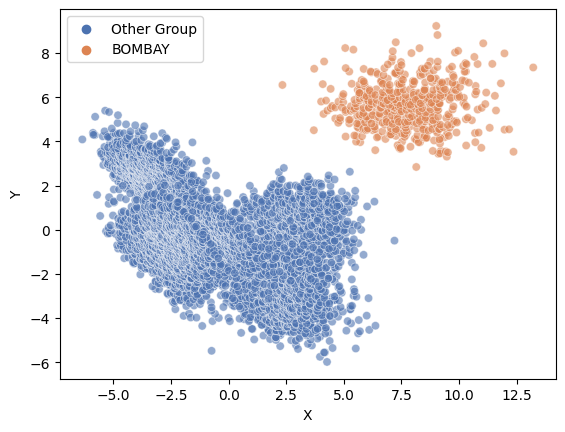

In [34]:
# Removendo classe "BARBUNYA" do dataFrame
dry_bean_df = dry_bean_df[dry_bean_df['Class'] != "BARBUNYA"]

# Criando cópia do dataframe para fazer alterações
dry_bean_df_filtered = dry_bean_df.copy()

# Classificar todos os pontos diferentes da classe "BOMBAY" de "Other Group"
dry_bean_df_filtered.loc[dry_bean_df_filtered['Class'] != "BOMBAY", 'Class'] = "Other Group"

plot_scatter(dry_bean_df_filtered)

### Salary DataSet - Não separável

Link: https://www.kaggle.com/datasets/sujaykapadnis/salaries-by-gender

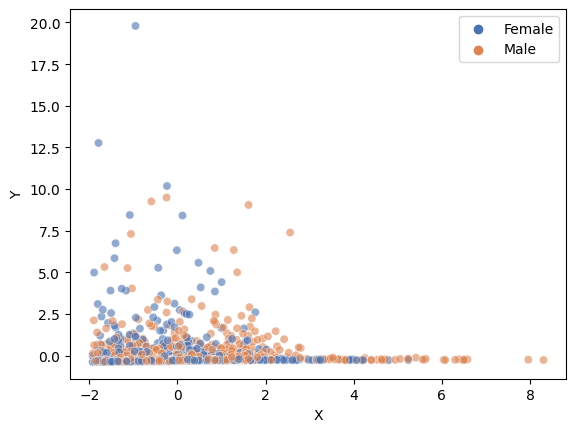

In [20]:
df = pd.read_csv("datasets/week4_australian_salary.csv", encoding='latin1')
df = df.drop('occupation', axis=1)
df = df.drop("Unnamed: 0", axis=1)

new_df = df.drop("gender", axis=1)

normalized_data = StandardScaler().fit_transform(new_df)

# Aplicar PCA para reduzir a dimensionalidade para 2
pca = PCA(n_components=2)
components = pca.fit_transform(normalized_data)

# Criar um novo DataFrame com os componentes principais
salary_df = pd.DataFrame(data=components, columns=['X', 'Y'])

# Concatenar o DataFrame original com os componentes principais
salary_df['Class'] = df["gender"]

plot_scatter(salary_df)